In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torch import load
import torch
import numpy as np
import os
import random
from PIL import Image
import sys

import datetime
from moviepy.editor import *

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2326528/45929032 bytes (5.1%)5611520/45929032 bytes (12.2%)8871936/45929032 bytes (19.3%)12173312/45929032 bytes (26.5%)15384576/45929032 bytes (33.5%)18522112/45929032 bytes (40.3%)21889024/45929032 bytes (47.7%)25059328/45929032 bytes (54.6%)28459008/45929032 bytes (62.0%)31825920/45929032 bytes (69.3%)35274752/45929032 bytes (76.8%)38543360/45929032 bytes (83.9%)

## **SMS function**

In [ ]:
!pip install twilio

     |████████████████████████████████| 489 kB 5.2 MB/s 
  Created wheel for twilio: filename=twilio-7.0.0-py2.py3-none-any.whl size=1296532 sha256=7dd8d355d7a5087f768f6073cf6eb607ee024be831add202ea0bf3fe207a87e6
  Stored in directory: /root/.cache/pip/wheels/49/e0/5c/e27aa9f55ed9f6c682752442575a541bc7eba4dd0e58eb36b9
Successfully built twilio


In [ ]:
import os
from twilio.rest import Client

In [ ]:
account_sid = "AC87f8fd03630eb54dd5c97ed4051551a2"  # write here your account sid and auth_token
auth_token = "42582c9abd5591f441a6a9930352440e"      
client= Client(account_sid,auth_token)

# **Yolov5**


In [ ]:
# weights are in this drive file : https://drive.google.com/drive/folders/19phTIk2n8ID0qHXRDP-il0hNJ9VpF9TS?usp=sharing
!git clone https://github.com/MeriemBek/SaveIt-public

Cloning into 'SaveIt-public'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 12 (delta 1), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 9418, done.
remote: Total 9418 (delta 0), reused 0 (delta 0), pack-reused 9418
Receiving objects: 100% (9418/9418), 9.86 MiB | 23.70 MiB/s, done.
Resolving deltas: 100% (6545/6545), done.
/content/yolov5
HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [ ]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


     |████████████████████████████████| 636 kB 5.1 MB/s 
Setup complete. Using torch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [ ]:
%cd /content/yolov5
%cp /content/SaveIt-public/IO_detect.py /content/yolov5

/content/yolov5


In [ ]:
# from moviepy.editor import *

# path="/content/yolov5/runs/detect/exp6/video-1633125469.mp4"

# clip=VideoFileClip(path)
# clip.ipython_display(width=500)

# **EfficientDet**

In [ ]:
%cd /content

/content


In [ ]:
#fresh curl courtesy of roboflow.ai, outputing our dataset in Coco Json format
!curl -L "https://app.roboflow.com/ds/GePVUgLA5H?key=DHpmUcwERI" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   879  100   879    0     0   1823      0 --:--:-- --:--:-- --:--:--  1823
100 13.7M  100 13.7M    0     0  20.9M      0 --:--:-- --:--:-- --:--:--  145M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/_annotations.coco.json  
 extracting: test/car_fire1_7_jpg.rf.4c46aef34c456027c4b0a94c8a736aee.jpg  
 extracting: test/fire1372_jpg.rf.f41756c67e75a1523a74a717118919c6.jpg  
 extracting: test/fire172_jpg.rf.e8aa6d875d648f9eff1637e87ac466de.jpg  
 extracting: test/forest_fire10_14_jpg.rf.e6eeb625c9ca4170a6b02579fc4fef66.jpg  
 extracting: test/forest_fire10_21_jpg.rf.2c16fb09209c36f7cc33dedcba1d57be.jpg  
 extracting: test/forest_fire11_106_jpg.rf.87f0e9e15885df439e8ad1dff45743c2.jpg  
 extracting: test/forest_fire11_172_jpg.rf.b8044659a0e33c2

In [ ]:
#in the next three cells, we move the data into a structure that the image detection library will be expecting
#but no file data manipulation is necessary
#images can also be segmented into class folders, but we combine all classes here
!mkdir fire
!mkdir fire/annotations
!mkdir fire/Annotations
!mkdir fire/Images

/content


In [ ]:
%cp train/_annotations.coco.json fire/annotations/instances_Images.json

In [ ]:
%cp train/*.jpg fire/Images/

In [ ]:
#directs the model towards file structure
root_dir = "./";
coco_dir = "fire";
img_dir = "./";
set_dir = "Images";

# Export Trained Weights

# Reloading Trained Weights after Export

In [ ]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 29.28 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.


In [ ]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-2b1gbf1c/pycocotools_f8fe13c5cb8d45cc8bc08a9e0713f406
  Running command git clone -q https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-2b1gbf1c/pycocotools_f8fe13c5cb8d45cc8bc08a9e0713f406
  Using cached https://github.com/chengs/tqdm/archive/colab.zip
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47878 sha256=001669a879802797c1f3cfa8d082186241dc2cadd3a04cd1d604a888b385e806
  Stored in directory: /tmp/pip-ephem-wheel-cache-g8yr05hm/wheels/b5/36/d9/593e7ac06d343d0a32138fa6c402dc3a0bd31442c9fe53f76c
Successfully built tqdm
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, b

In [ ]:
!mkdir trained

mkdir: cannot create directory ‘trained’: File exists


In [ ]:
#recover trained weights
!cp 'signatrix_efficientdet_coco_2021-09-27-22_36.onnx' 'trained/signatrix_efficientdet_coco.onnx'
!cp 'signatrix_efficientdet_coco_2021-09-27-22_36.pth' 'trained/signatrix_efficientdet_coco.pth'

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer
gtf = Infer();

In [ ]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="trained/")

In [ ]:
#extract class list from our annotations
#in your application you will probably already have this saved
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [ ]:
class_list

['effiecient-det', '-1', 'fire']

In [ ]:
%%time
#bang!
img_path = "test/forest_fire3_135_jpg.rf.20dca59236aca1f758066c4ed478353b.jpg";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.382s)
CPU times: user 85.8 ms, sys: 21.5 ms, total: 107 ms
Wall time: 474 ms


In [ ]:
scores
boxes

tensor([[173.1022, 298.7833, 223.5957, 399.8288],
        [220.9459, 252.7001, 315.9079, 366.2562],
        [  6.5658, 235.5324,  83.1971, 373.7024],
        [293.2739, 185.6639, 356.0203, 279.7897],
        [  4.3839, 224.8736,  24.0234, 254.3415]], device='cuda:0')

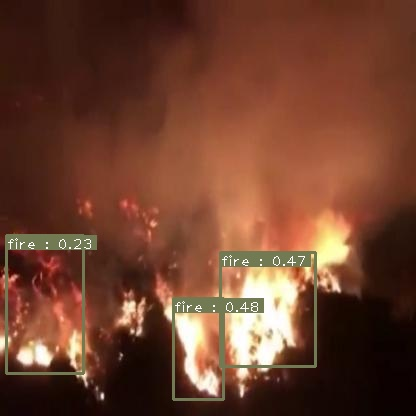

In [ ]:
from IPython.display import Image
Image(filename='output.jpg')

Done. (0.059s)


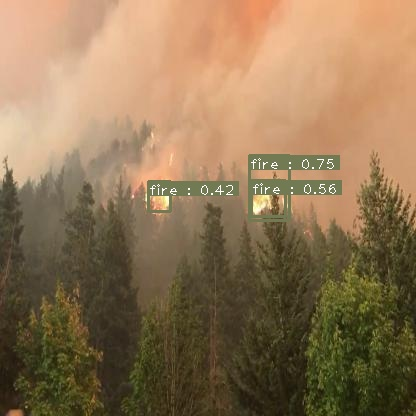



Done. (0.060s)


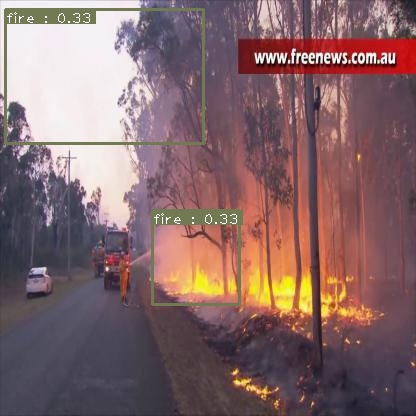



Done. (0.054s)


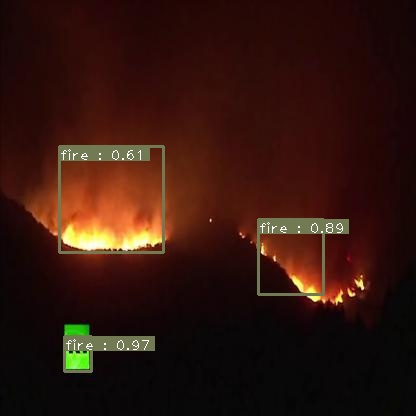



Done. (0.054s)


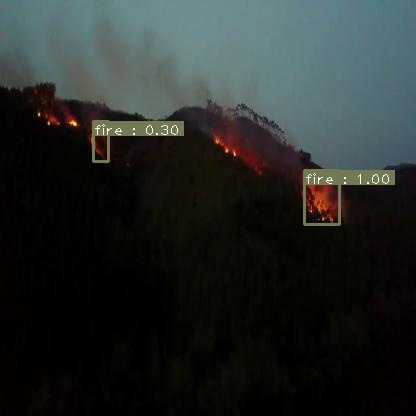



Done. (0.054s)


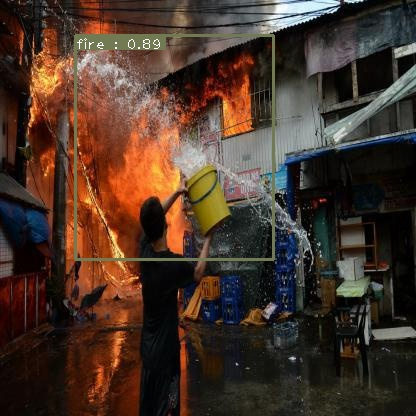



Done. (0.056s)


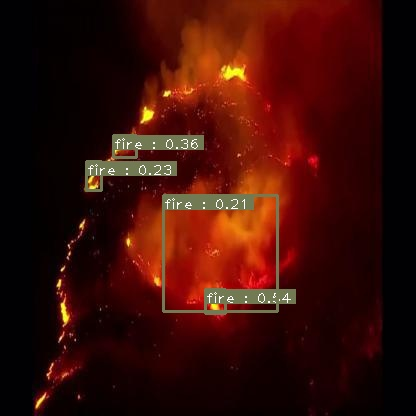



Done. (0.062s)


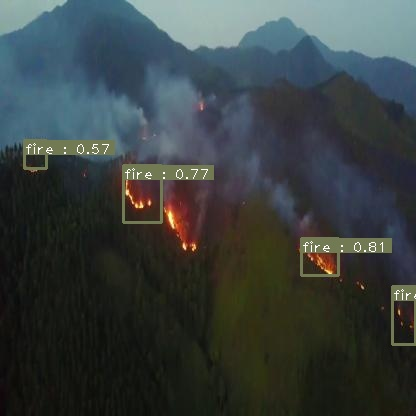



Done. (0.057s)


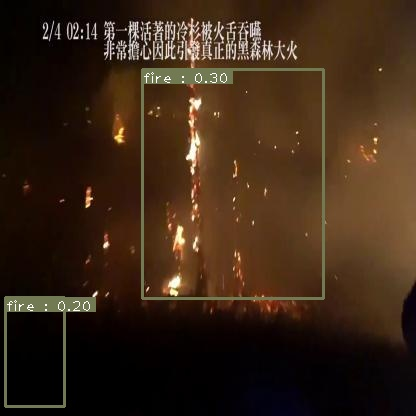



Done. (0.055s)


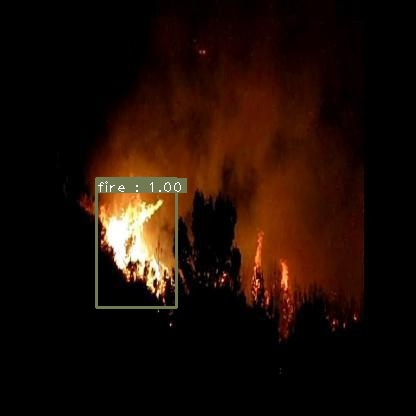



Done. (0.054s)


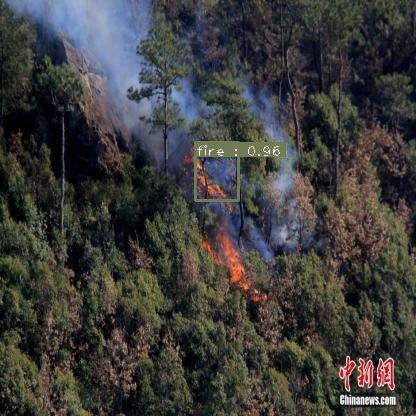



Done. (0.064s)


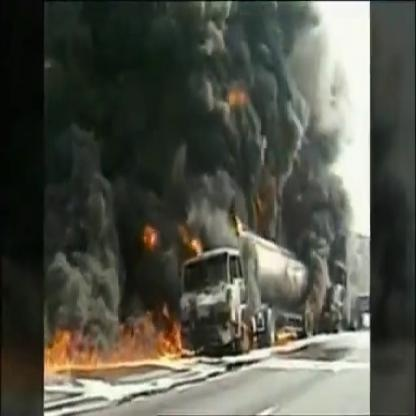



Done. (0.054s)


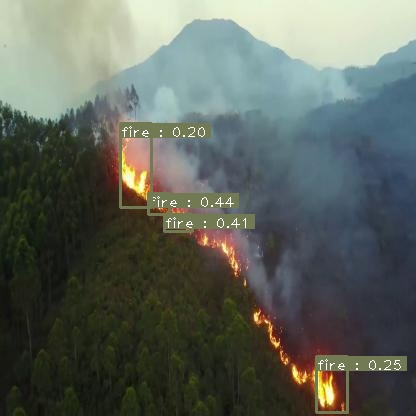



Done. (0.054s)


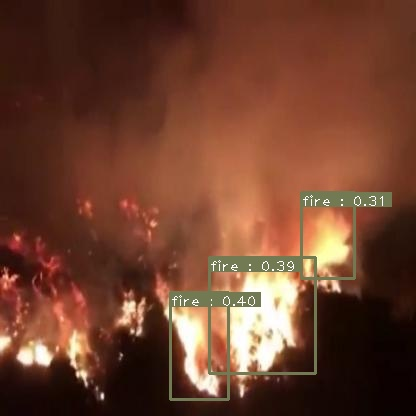



Done. (0.058s)


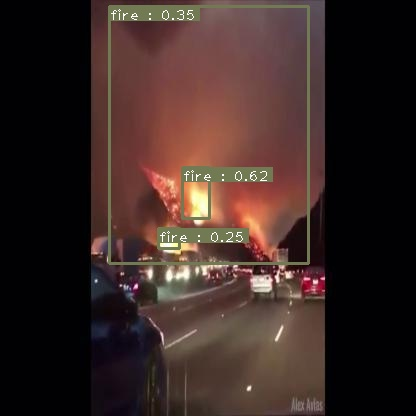



Done. (0.059s)


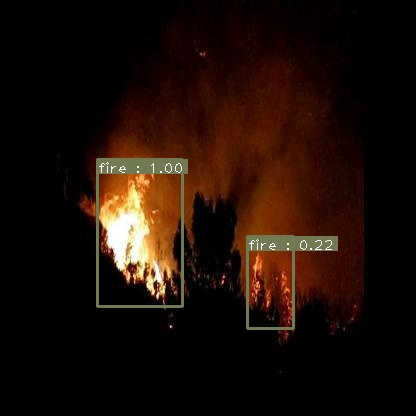



Done. (0.055s)


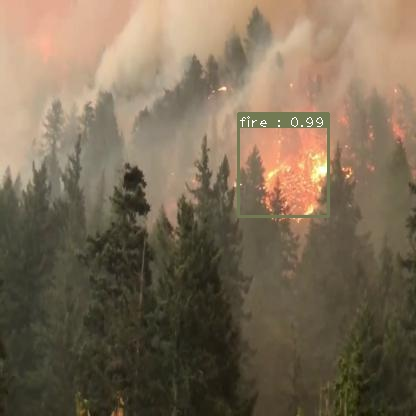



Done. (0.057s)


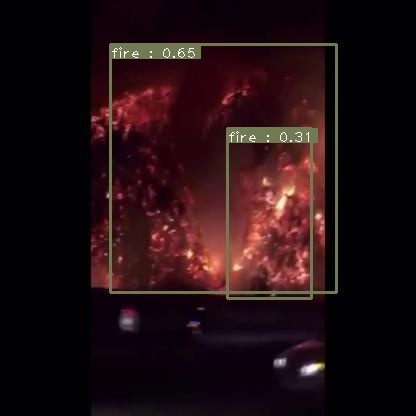



Done. (0.067s)


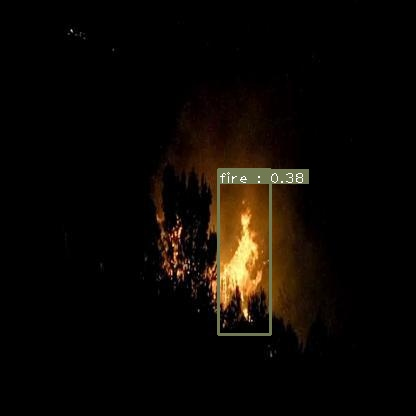



Done. (0.061s)


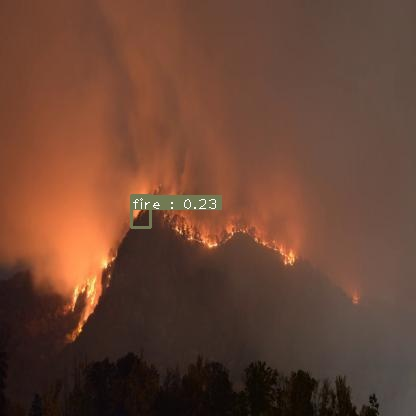



Done. (0.055s)


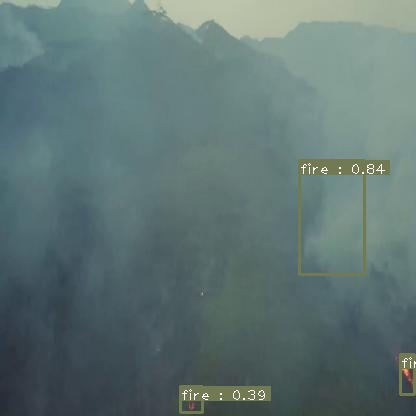



Done. (0.054s)


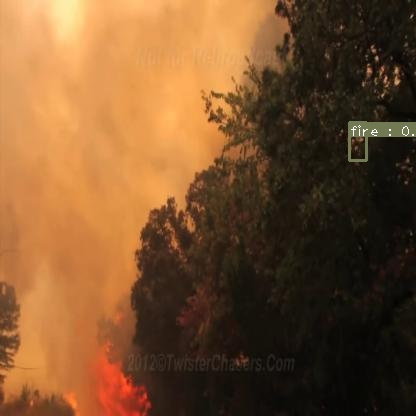



Done. (0.056s)


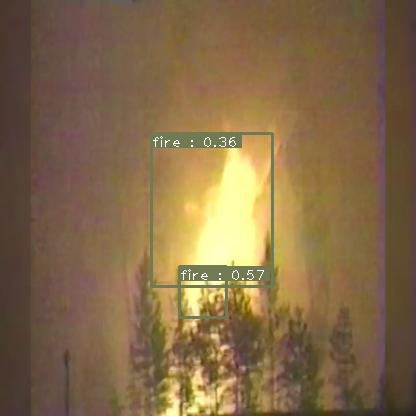



Done. (0.054s)


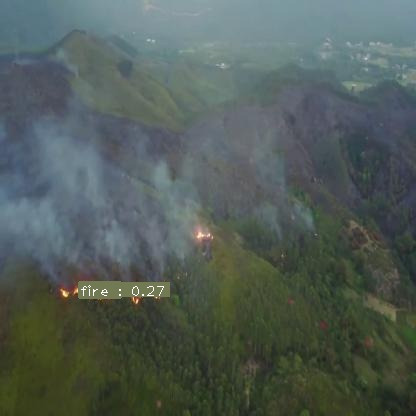



Done. (0.058s)


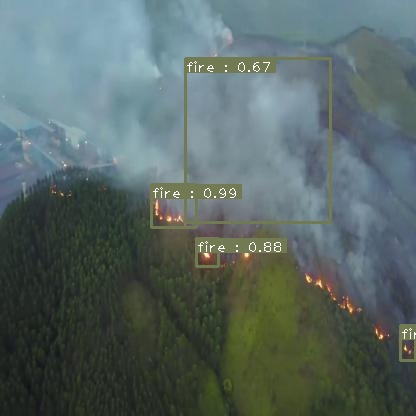



Done. (0.057s)


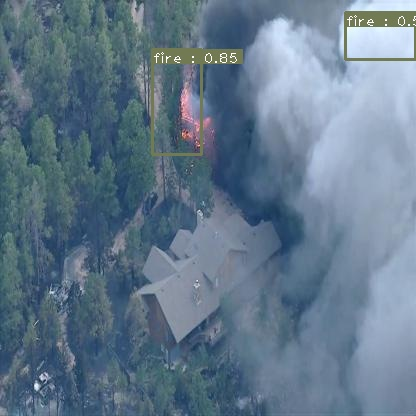



Done. (0.054s)


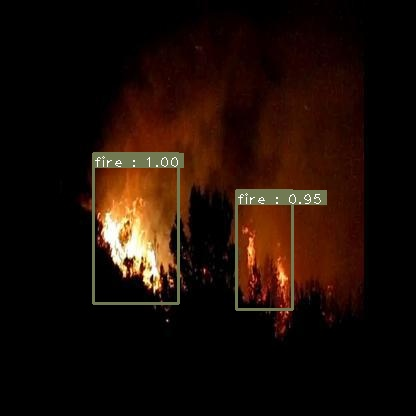



Done. (0.054s)


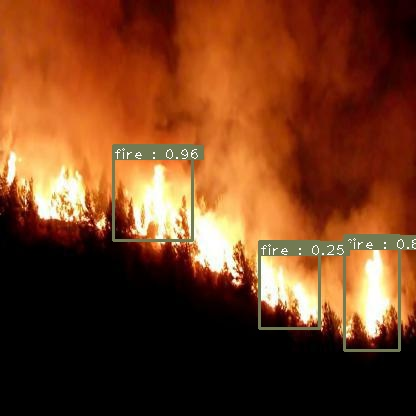



Done. (0.059s)


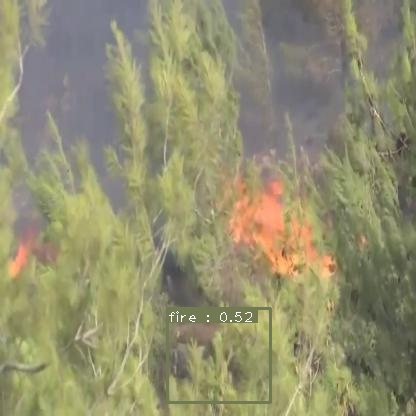



Done. (0.055s)


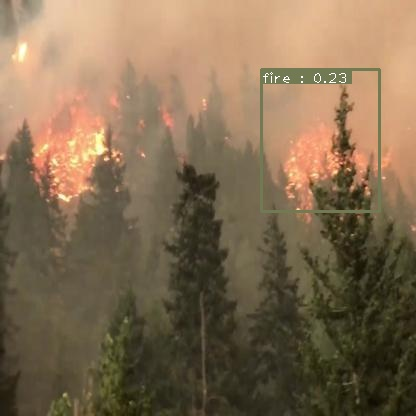



Done. (0.054s)


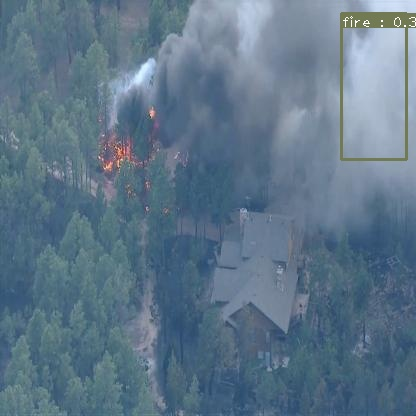



Done. (0.070s)


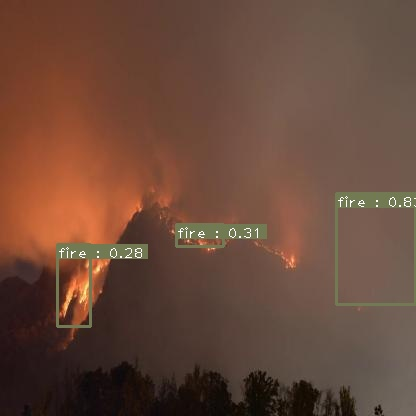



Done. (0.059s)


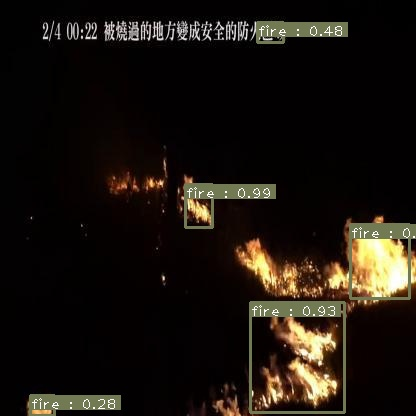



Done. (0.100s)


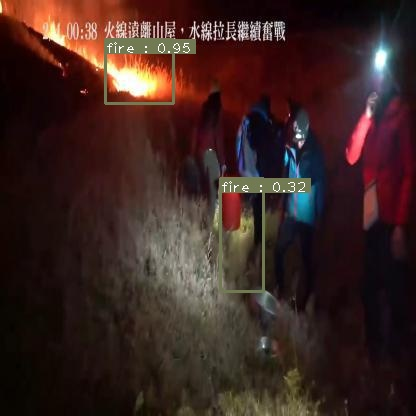



Done. (0.071s)


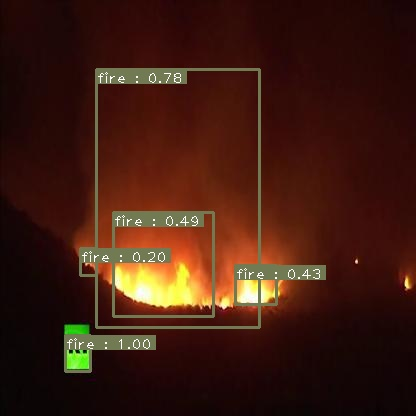



Done. (0.055s)


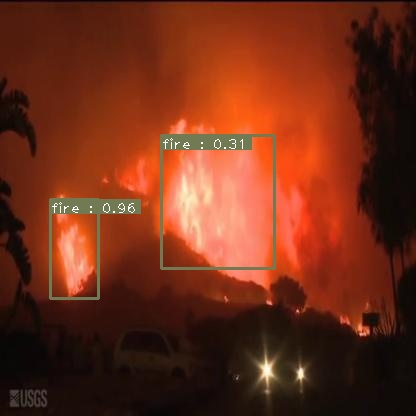



Done. (0.063s)


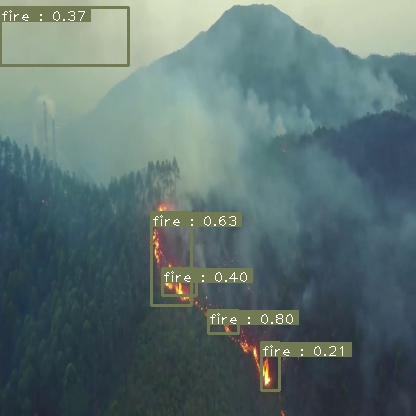



Done. (0.062s)


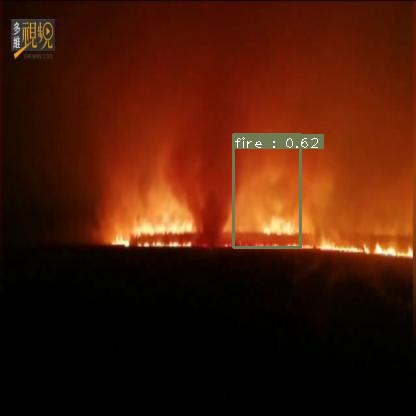



Done. (0.058s)


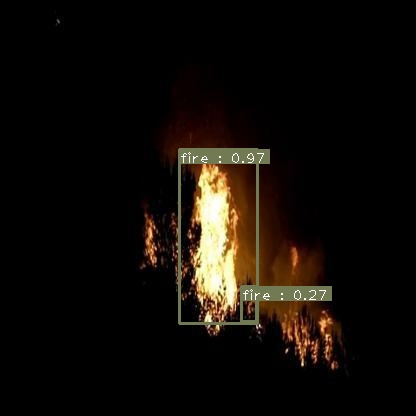



Done. (0.060s)


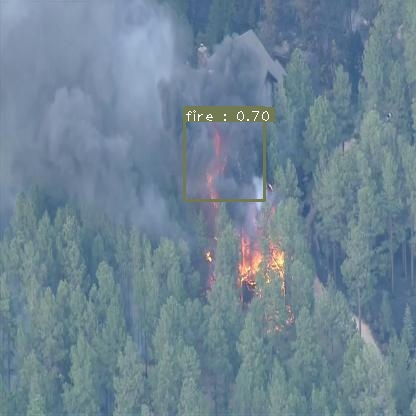



Done. (0.055s)


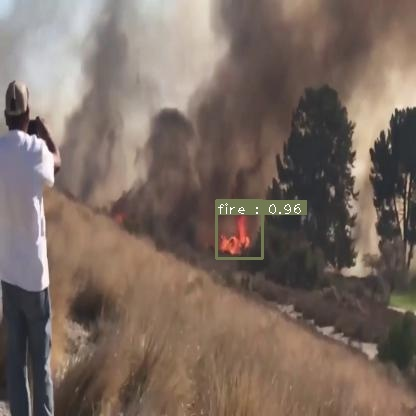

In [ ]:
# #bang!
import glob
for imageName in glob.glob('test/*.jpg'): #assuming JPG
    gtf.Predict(imageName, class_list, vis_threshold=0.2);
    display(Image(filename='output.jpg'))
    print("\n")

# Cropping

In [ ]:
import numpy as np # linear algebra
import xml.etree.ElementTree as ET # for parsing XML
import matplotlib.pyplot as plt # to show images
from PIL import Image # to read images
import os
import glob

def crop_image(img,bbx):
  cropped = []
  plt.figure(figsize=(10,10))
  im=Image.open(img)
  for i in range(0,len(bbx)):
    cropped.append(im.crop(bbx[i]))       
  return cropped 

crp = crop_image("test/forest_fire3_135_jpg.rf.20dca59236aca1f758066c4ed478353b.jpg",boxes.tolist())

In [ ]:
crp[0]

In [ ]:
crp[1]

# **EfficientNet**

In [ ]:
import tensorflow as tf

In [ ]:
EfficientNet_model = tf.keras.models.load_model('/content/drive/MyDrive/my_model')
EfficientNet_model.load_weights('/content/drive/MyDrive/my_model/my_model_weights.h5')

In [ ]:
classes = ['fire','sunset']

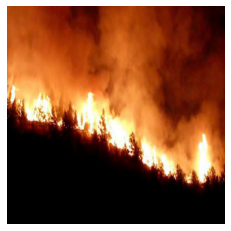

[[0.9210358 0.0789642]]
fire


In [ ]:
claass =['fire','sunset']
from PIL import Image
image = Image.open("test/forest_fire35_1440_jpg.rf.b80f121ce7f1aa4a9608ed5d8c205e40.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()
prediction_scores = EfficientNet_model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print(prediction_scores)
print(claass[predicted_index])

# **Combine EfficientNetv2 & EfficientDet**




In [ ]:
from PIL import Image
def NetDet(imagePath,class_list = class_list):
  low_thr  = 0.1
  high_thr = 1.0
  image = Image.open(imagePath)
  duration, scores, labels, boxes = gtf.Predict(imagePath, class_list, vis_threshold=0.2);
  probDet = max(scores.tolist())
  print(probDet)
  if low_thr<=probDet<= high_thr:
      prediction_scores = EfficientNet_model.predict(np.expand_dims(image, axis=0))
      max_predicted = max(max(prediction_scores))
      predicted_index = np.argmax(prediction_scores)
      if max_predicted >= 0.48:
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        print(prediction_scores)
        print(claass[predicted_index])
      else :
        print('E')
  else:
      print('d')

In [ ]:
duration, scores, labels, boxes = gtf.Predict("test/forest_fire3_135_jpg.rf.20dca59236aca1f758066c4ed478353b.jpg", class_list, vis_threshold=0.2);
scores.tolist()

Done. (0.060s)


[0.39504754543304443,
 0.39341962337493896,
 0.30788522958755493,
 0.11101674288511276,
 0.07151259481906891,
 0.055529601871967316]

Done. (0.059s)
0.3987889289855957


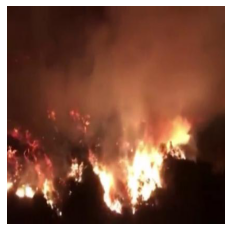

[[0.7558007 0.2441993]]
fire


In [ ]:
img_path = "test/forest_fire3_135_jpg.rf.20dca59236aca1f758066c4ed478353b.jpg"
NetDet(img_path)

# Final model

In [ ]:
# write here your account sid and auth_token
# Example :  "AC726b2b3e87443c545627cb91d59309c3" --auth_token "a4b5e14bd187a58d3d47ef4de52db4f1"
# +213791270492   
# +18645318362
%%time
now = datetime.datetime.now()
if (now.hour > 6 and now.minute > 0 and now.hour < 19 ):
  #from 6am to 7pm Yolov5
  %cd /content/yolov5/
  !python IO_detect.py --weights /content/drive/MyDrive/AI_SIC_PROJECT/developement/last-day/best_weights.pt --img 416 --conf 0.4 --source '/content/drive/MyDrive/AI_SIC_PROJECT/developement/dataset/video3/video-1632788990.mp4' # exemple of  video 
else: 
  NetDet(img_path)
#AC87f8fd03630eb54dd5c97ed4051551a2    42582c9abd5591f441a6a9930352440e
  
 

In [ ]:
def displayResults(path):
  clip=VideoFileClip(path)
  clip.ipython_display(width=1000)